**bold text**# Heart_Disease_Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

folder_path = '/content/drive/My Drive/HDMxSp'
for filename in os.listdir(folder_path):
    print(filename)

ask-detrano
switzerland.data
processed.va.data
reprocessed.hungarian.data
WARNING
heart-disease.names
cleveland.data
new.data
hungarian.data
long-beach-va.data
Index
processed.hungarian.data
cleve.mod
processed.cleveland.data
processed.switzerland.data
bak
costs
data


In [3]:
import pandas as pd

data_path = folder_path + '/processed.cleveland.data'
df = pd.read_csv(data_path, header=None)  # No header row in the file

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Show the first few rows of the raw file
with open(data_path, 'r') as f:
    for _ in range(5):
        print(f.readline())

63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0

67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2

67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1

37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0

41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



In [5]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]
df.columns = column_names
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (in case any entries are still strings)
df = df.apply(pd.to_numeric, errors='coerce')

# Check missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


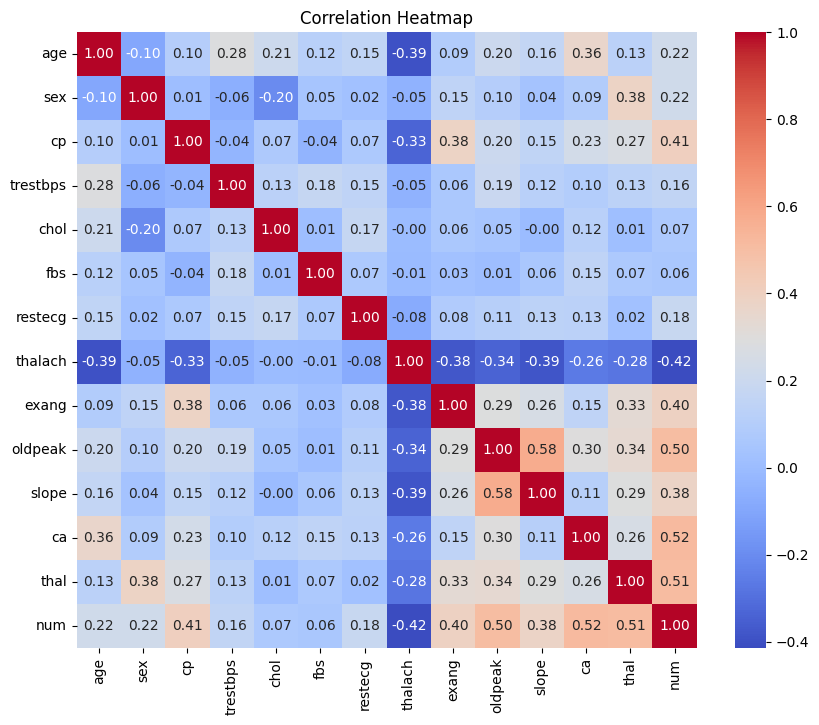

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (NaNs are ignored)
corr = df.corr()

# Display as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df = df.dropna()
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [9]:
print(df['num'].value_counts())

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [10]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print(df['num'].value_counts())

num
0    160
1    137
Name: count, dtype: int64


In [11]:
import os
os.makedirs('data', exist_ok=True)

In [12]:
data_folder_path = os.path.join('/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data', 'data')
os.makedirs(data_folder_path, exist_ok=True)
output_path = os.path.join(data_folder_path, 'processed_heart_disease.csv')
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to /drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/data/processed_heart_disease.csv


# Task
Visualize the dataset using various plots such as bar plots and histograms.

## Visualize categorical features

### Subtask:
Create bar plots for categorical columns ('cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal').


**Reasoning**:
Iterate through the specified categorical columns and create a count plot for each to visualize the distribution of values.



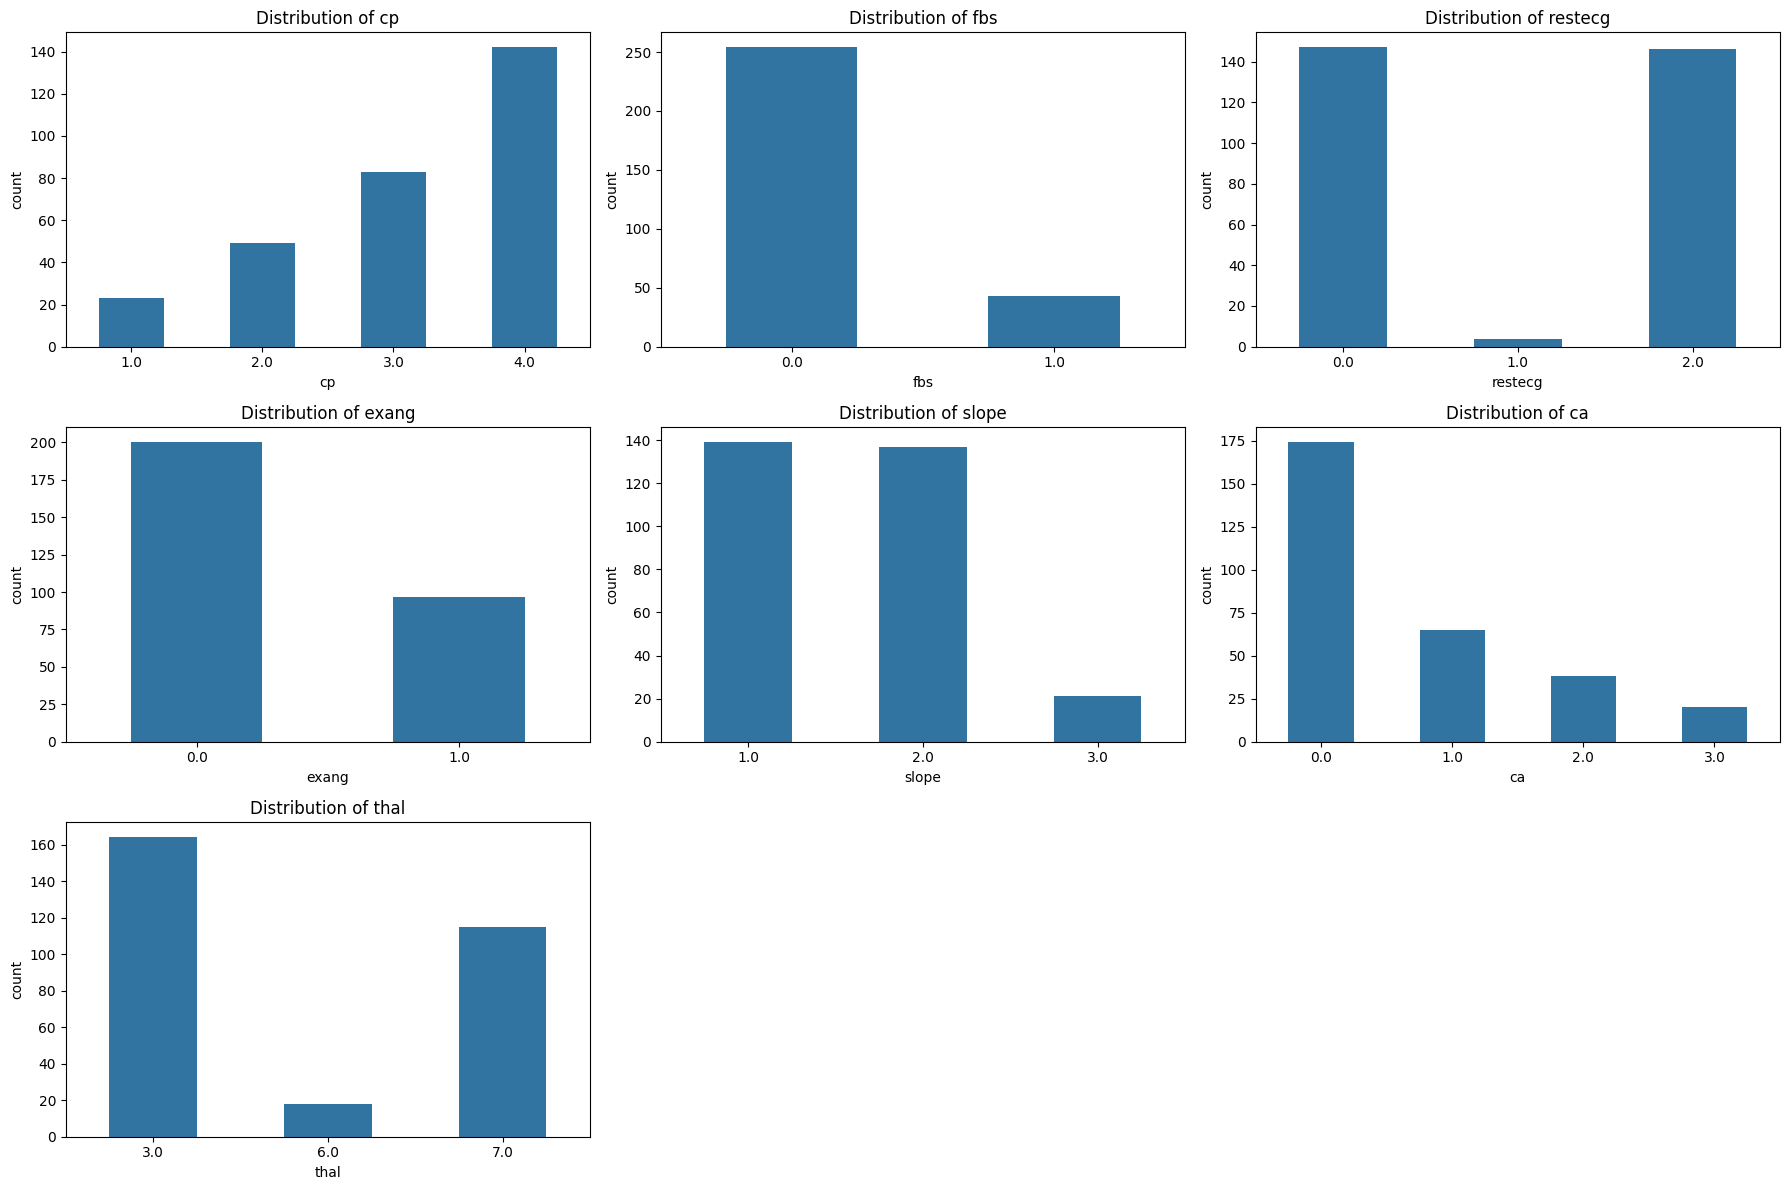

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Determine the number of rows and columns for subplots
n_cols = 3  # You can adjust this based on how many columns you want
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], width=0.5) # Adjust width here
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Visualize numerical features

### Subtask:
Create histograms for numerical columns ('trestbps', 'chol', 'thalach', 'oldpeak').


**Reasoning**:
Create histograms for the specified numerical columns.



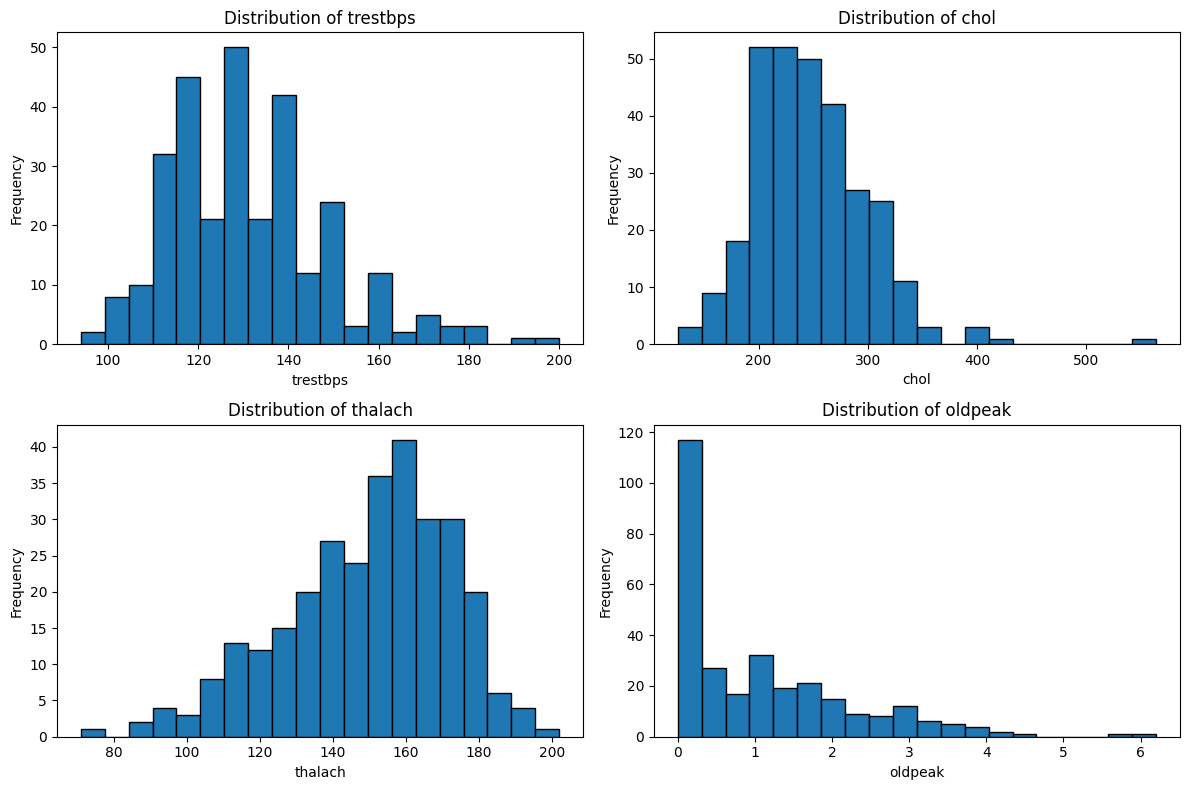

In [14]:
numerical_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

n_cols = 2 # Adjust as needed
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black') # Added edgecolor for borders
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Explore relationships between features

### Subtask:
Create plots like scatter plots or box plots to examine relationships between different features and the target variable.


**Reasoning**:
Create box plots to visualize the relationship between 'age', 'thalach', 'oldpeak', 'cp' and the target variable 'num'.



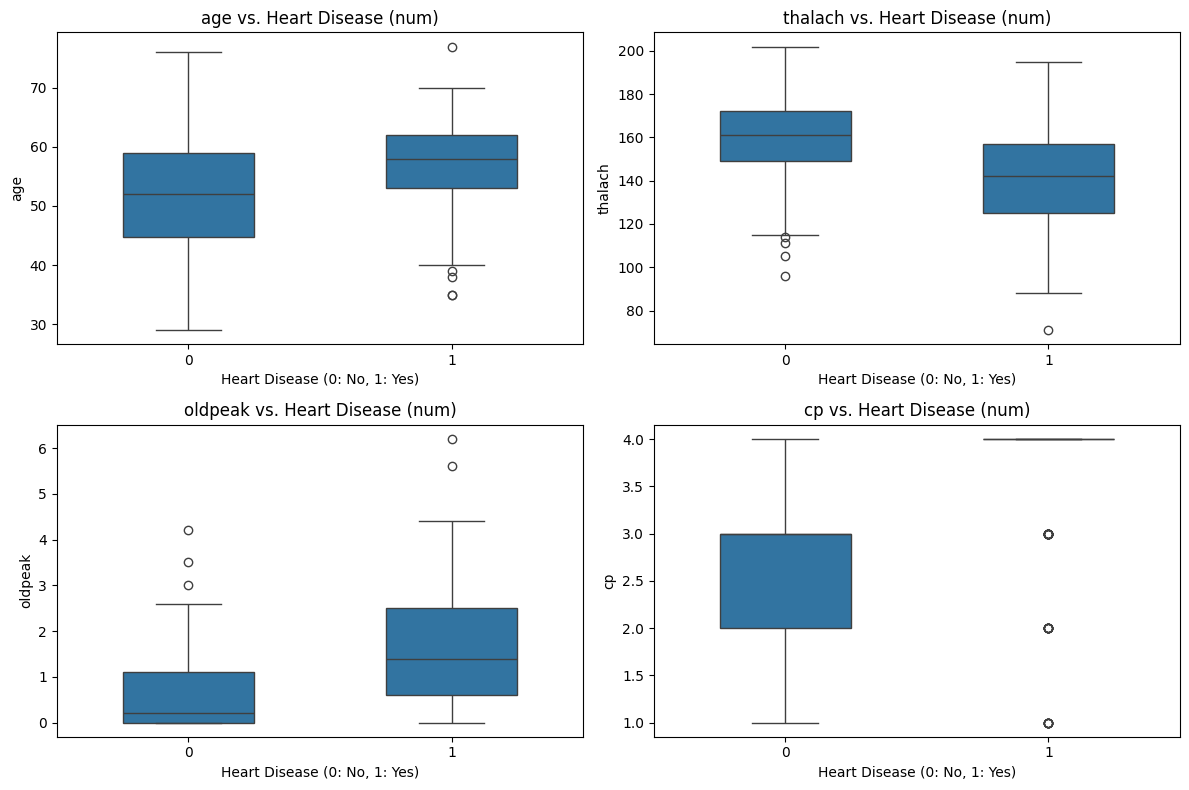

In [15]:
cols_to_plot = ['age', 'thalach', 'oldpeak', 'cp']

n_cols = 2 # Adjust as needed
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x='num', y=col, data=df, ax=axes[i], width=0.5) # Added width parameter
    axes[i].set_title(f'{col} vs. Heart Disease (num)')
    axes[i].set_xlabel('Heart Disease (0: No, 1: Yes)')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Bar plots were created to visualize the distribution of categorical features such as 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal'.
*   Histograms were generated to show the distribution of numerical features including 'trestbps', 'chol', 'thalach', and 'oldpeak'.
*   Box plots were used to explore the relationship between the target variable ('num') and features like 'age', 'thalach', 'oldpeak', and 'cp', illustrating how the distribution of these features varies between individuals with and without heart disease.

### Insights or Next Steps

*   Further investigate the distributions and relationships observed in the visualizations to identify potential predictors of heart disease.
*   Consider creating more advanced plots or statistical tests to quantify the strength of the relationships between features and the target variable.
